Questions:

In [1]:
import numpy as np
import pandas as pd
import string
import os

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')

DATA_DIR = 'Data/'
NCES_DIR = 'nces/'

# Read data

In [87]:
df = pd.read_csv(os.path.join(DATA_DIR, 'AR_un_locations.csv'))
print(df.shape)
pd.concat((df.head(3), df.tail(3)), axis=0)

(1846, 23)


,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,Address1,City,...,Market,Industry,StudentCount,LocDesc,LocSquareFootage,LocationZip,Zipnum,COUNTYNM,County,Regions
0,397758056-9.0,9.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,Pine Bluff High School,279283.0,NaN,71601,Jefferson,Jefferson,Timberlands
1,397758056-10.0,10.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,Jack Robey Jr. High School,115073.0,NaN,71601,Jefferson,Jefferson,Timberlands
2,397758056-7.0,7.0,397758056,001000000034cEeAAI,500026.0,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,Education,4944,W. T. Cheney Elementary School,59942.0,NaN,71601,Jefferson,Jefferson,Timberlands
1843,465761140-14724.0,14724.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,ZZ Do Not Use All Locations,0.0,NaN,72958,Scott,Scott,Ouachitas
1844,465761140-14720.0,14720.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,Elementary School Campus,99312.0,NaN,72958,Scott,Scott,Ouachitas
1845,465761140-14719.0,14719.0,465761140,00100000004DIavAAG,513680.0,Waldron Public Schools,0,(479) 637-3179,1560 W. Sixth St.,Waldron,...,Education,Education,1730,Middle School Campus,96834.0,NaN,72958,Scott,Scott,Ouachitas


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 23 columns):
un_loc                 1846 non-null object
LociD                  1800 non-null float64
DudeAccountNumber      1846 non-null int64
SalesForceAccountID    1846 non-null object
EducationID            1836 non-null float64
ClientName             1846 non-null object
SchoolDudeReference    1846 non-null int64
PhoneNumber            1846 non-null object
Address1               1846 non-null object
City                   1846 non-null object
State                  1846 non-null object
ZipCode                1846 non-null object
Country                1846 non-null object
Market                 1846 non-null object
Industry               1846 non-null object
StudentCount           1846 non-null int64
LocDesc                1799 non-null object
LocSquareFootage       1780 non-null float64
LocationZip            0 non-null float64
Zipnum                 1846 non-null int64
COUNTYNM        

In [89]:
#df.dropna(axis=0, how='any', subset=['EducationID'], inplace=True)
print(df.shape)

(1846, 23)


In [90]:
df.columns

Index(['un_loc', 'LociD', 'DudeAccountNumber', 'SalesForceAccountID',
       'EducationID', 'ClientName', 'SchoolDudeReference', 'PhoneNumber',
       'Address1', 'City', 'State', 'ZipCode', 'Country', 'Market', 'Industry',
       'StudentCount', 'LocDesc', 'LocSquareFootage', 'LocationZip', 'Zipnum',
       'COUNTYNM', 'County', 'Regions'],
      dtype='object')

In [91]:
df.LocDesc.head()

0            Pine Bluff High School
1        Jack Robey Jr. High School
2    W. T. Cheney Elementary School
3                         Warehouse
4       Southwood Elementary School
Name: LocDesc, dtype: object

In [92]:
db = pd.read_csv(os.path.join(DATA_DIR,'ccd_sch_029_1617_w_0e_050317.csv' ), encoding='iso-8859-1')
db.NCESSCH = db.NCESSCH.astype(str)
db['LEAIDs'] = db.LEAID.astype(str)
print(db.shape)
pd.concat((db.head(3), db.tail(3)), axis=0)

C:\Users\lprevost\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,21,22,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(102071, 66)


,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED,LEAIDs
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,No,No,No,7,12,High,As reported,100002
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,No,No,No,7,12,High,As reported,100002
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,No,No,No,7,12,High,As reported,100002
102068,2016-2017,78,U.S. VIRGIN ISLANDS,VI,YVONNE BOWSKY ELEMENTARY SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,Not reported,Not reported,Not reported,Not reported,Not reported,M,M,Not reported,As reported,7800030
102069,2016-2017,78,U.S. VIRGIN ISLANDS,VI,CANCRYN JUNIOR HIGH SCHOOL,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,Not reported,Not reported,Not reported,Not reported,Not reported,M,M,Not reported,As reported,7800030
102070,2016-2017,78,U.S. VIRGIN ISLANDS,VI,BERTHA BOSCHULTE JUNIOR HIGH,Saint Thomas - Saint John School District,1,NaN,VI-001,7800030,...,Not reported,Not reported,Not reported,Not reported,Not reported,M,M,Not reported,As reported,7800030


In [94]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102071 entries, 0 to 102070
Data columns (total 66 columns):
SCHOOL_YEAR            102071 non-null object
FIPST                  102071 non-null int64
STATENAME              102071 non-null object
ST                     102071 non-null object
SCH_NAME               102071 non-null object
LEA_NAME               102071 non-null object
STATE_AGENCY_NO        102071 non-null int64
UNION                  2531 non-null float64
ST_LEAID               102071 non-null object
LEAID                  102071 non-null int64
ST_SCHID               102071 non-null object
NCESSCH                102071 non-null object
SCHID                  102071 non-null int64
MSTREET1               102071 non-null object
MSTREET2               1823 non-null object
MSTREET3               26 non-null object
MCITY                  102071 non-null object
MSTATE                 102071 non-null object
MZIP                   102071 non-null int64
MZIP4                  6038

# Match EducationID to NCESSCH (CCD Unique School Identifier)

In [95]:
print(df.EducationID.unique().shape)
df.EducationID = df.EducationID.astype(str)
df.EducationID = df.EducationID.map(lambda s: s[:-2] if s[-2:]==".0" else s)
print(df.EducationID.str.len().value_counts())
df.EducationID.unique()

(232,)
6    1836
3      10
Name: EducationID, dtype: int64


array(['500026', '514140', '505410', '513930', '504800', '505170',
       '505500', '500042', '507710', '508640', '509630', '509840',
       '505470', '500067', '514400', '500028', '500006', '507290',
       '506060', '500032', '511220', '505680', '507110', '507230',
       '508340', '500044', '512510', '512930', '512630', '507840',
       '502580', '503300', '500049', '505340', '506240', '506360',
       '507860', '500065', '509780', '510380', '504110', '513110',
       '511820', '500030', '506420', '508670', '504860', '507890',
       '506690', '502430', '503240', '510980', '507920', '500073',
       '509750', '510170', '509990', '510320', '503770', '508610',
       '500405', '502670', '502700', '502790', '502880', '512570',
       '507320', '505580', '502960', '503480', '503630', '503690',
       '503750', '503960', '510410', '504350', '504410', '504590',
       '505190', '500001', '505850', '506900', '507140', '514370',
       '507530', '514040', 'nan', '504170', '509060', '509600'

In [96]:
def load_files(fname='usps.csv', output = 'dict'):
    """
    load abbreviation from file fname
    return dictionary {pattern : replacement}
    return list [list of items to remove from strings to avoid]
    """
    if output == "dict":
        df = pd.read_csv(fname, index_col='pattern')
        return df.to_dict()
    elif output == "list":
        df = pd.read_csv(fname, header=0)
        col = df.columns[0]
        return df[col].tolist()

USPS = load_files('usps.csv')
SCHOOL_ABREV = load_files('school_abbrev.csv')
SCHOOL_NOISYWORDS = load_files('school_noisywords.csv', output = "list")

def handle_strings(x, exclude=set(string.punctuation)):
    """
    Helper function to make string all caps and remove punctuation.
    
    x: any string
    """
    
    x = x.replace('-', ' ')
    x = ''.join(ch for ch in x if ch not in exclude)
    return x

def handle_words(x, exclude=[], case = 'u'):
    ''' Helper function to remove words from match comparisons that don't have signal but are noisy 
    
        x: any string
        exclude = list of words that are removed from comparison strings for matching.
    '''
    case = case[0].lower()
    exclude = [word.lower() for word in exclude]
    x = x.lower().split(" ")
    x = ' '.join(word for word in x if word not in exclude)
    if case == 'u':
        if type(x) is str:
            x = x.upper()
        else:
            x = [word.upper() for word in x]
    return x

words = "Lee Prevost Junior Senior High School"
print ('words_handled ', handle_words(words, exclude = SCHOOL_NOISYWORDS))

def normalizeText(inputValue, d={}, case='u', noise_list = None):
    '''
    if case=='l', returns lowercase
    if case=='u', returns uppercase
    else returns proper case
    d = dictionary to use for replacements
    '''
    
    case = case[0].lower()
    abbv = d
    words = inputValue.split()
    for i,word in enumerate(words):
        w = handle_strings(word.lower())
        rep = abbv[w] if w in abbv.keys() else handle_strings(words[i])
        words[i] = rep.upper() if case == 'u' else rep.lower() if case == 'l' else (rep[0].upper() + rep[1:])
    
    return ' '.join(words)


s = '1020 W. Holland Avenue.'
print("%s -> %s" % (s, normalizeText(s, d = USPS)))
    
s = 'JNPSD WARREN DUPREE ES'
print("%s -> %s" % (s, normalizeText(s, d = SCHOOL_ABREV['replacement'])))

words_handled  LEE PREVOST
1020 W. Holland Avenue. -> 1020 W HOLLAND AVENUE
JNPSD WARREN DUPREE ES -> JNPSD WARREN DUPREE ELEMENTARY SCHOOL


  ## rewrite to do this in steps:
    1) load data
    2) normalize text 
        (all caps, no puntuation.
         convert typical abbreviations
     3) Set school types
     4) match and append
     

In [97]:
SCHOOL_NOISYWORDS

['school',
 'middle',
 'high',
 'junior',
 'senior',
 'charter',
 'magnet',
 'senior',
 'elementary']

In [103]:
df['normLocDesc'] = df.LocDesc.astype(str).map(lambda x: normalizeText(x, d=SCHOOL_ABREV['replacement']))
df['normLocDesc'] = df.normLocDesc.astype(str).map(lambda x: normalizeText(x, d=USPS))

In [99]:
df.normLocDesc

0                        PINE BLUFF HIGH SCHOOL
1                     JACK ROBEY JR HIGH SCHOOL
2                  W T CHENEY ELEMENTARY SCHOOL
3                                     WAREHOUSE
4                   SOUTHWOOD ELEMENTARY SCHOOL
5                PINE BLUFF SCHOOL ADM BUILDING
6                                    FIRST WARD
7                       SOUTHEAST MIDDLE SCHOOL
8                        JORDAN CHANAY BUILDING
9              GIFTEDTALENTED SCOGGINS MAY HALL
10                    MAINTENANCETRANSPORTATION
11       PINE BLUFF SCHOOLS ADMINISTRATION BLDG
12                  BROADMOOR ELEMENTARY SCHOOL
13                                BELAIR SCHOOL
14          THIRTY FOURTH AVE ELEMENTARY SCHOOL
15           FORREST PARK GREENVILLE PRE SCHOOL
16                   OAK PARK ELEMENTARY SCHOOL
17                     TAYLOR ELEMENTARY SCHOOL
18                       WHITE HALL HIGH SCHOOL
19                     WHITE HALL MIDDLE SCHOOL
20                     HARDIN ELEMENTARY

In [100]:
df[['LocDesc', 'normLocDesc']].to_csv('sample_norm_schools.csv', header = True)

In [102]:
db['norm_SCH_NAME']= db['SCH_NAME'].map(lambda x: normalizeText(x, d=SCHOOL_ABREV['replacement']))
db['norm_SCH_NAME']= db['norm_SCH_NAME'].map(lambda x: normalizeText(x, d=USPS))

In [104]:
education_ids = set(df.EducationID.unique())
db_district = db[db.LEAIDs.isin(education_ids)]
print(db_district.shape)

(1015, 67)


# Match 1 example

In [105]:
row_num = 7
row = df.iloc[row_num, :]
print(df.columns.values)
print(db_district.columns.values)
df.iloc[row_num : row_num + 1, :]

['un_loc' 'LociD' 'DudeAccountNumber' 'SalesForceAccountID' 'EducationID'
 'ClientName' 'SchoolDudeReference' 'PhoneNumber' 'Address1' 'City' 'State'
 'ZipCode' 'Country' 'Market' 'Industry' 'StudentCount' 'LocDesc'
 'LocSquareFootage' 'LocationZip' 'Zipnum' 'COUNTYNM' 'County' 'Regions'
 'normLocDesc']
['SCHOOL_YEAR' 'FIPST' 'STATENAME' 'ST' 'SCH_NAME' 'LEA_NAME'
 'STATE_AGENCY_NO' 'UNION' 'ST_LEAID' 'LEAID' 'ST_SCHID' 'NCESSCH' 'SCHID'
 'MSTREET1' 'MSTREET2' 'MSTREET3' 'MCITY' 'MSTATE' 'MZIP' 'MZIP4'
 'LSTREET1' 'LSTREET2' 'LSTREET3' 'LCITY' 'LSTATE' 'LZIP' 'LZIP4' 'PHONE'
 'WEBSITE' 'SY_STATUS' 'SY_STATUS_TEXT' 'UPDATED_STATUS'
 'UPDATED_STATUS_TEXT' 'EFFECTIVE_DATE' 'SCH_TYPE_TEXT' 'SCH_TYPE'
 'RECON_STATUS' 'OUT_OF_STATE_FLAG' 'CHARTER_TEXT' 'CHARTAUTH1'
 'CHARTAUTHN1' 'CHARTAUTH2' 'CHARTAUTHN2' 'NOGRADES' 'G_PK_OFFERED'
 'G_KG_OFFERED' 'G_1_OFFERED' 'G_2_OFFERED' 'G_3_OFFERED' 'G_4_OFFERED'
 'G_5_OFFERED' 'G_6_OFFERED' 'G_7_OFFERED' 'G_8_OFFERED' 'G_9_OFFERED'
 'G_10_OFFERED' 'G_

,un_loc,LociD,DudeAccountNumber,SalesForceAccountID,EducationID,ClientName,SchoolDudeReference,PhoneNumber,Address1,City,...,Industry,StudentCount,LocDesc,LocSquareFootage,LocationZip,Zipnum,COUNTYNM,County,Regions,normLocDesc
7,397758056-8.0,8.0,397758056,001000000034cEeAAI,500026,Pine Bluff School District,0,(870) 543-4200,512 Pine Street,Pine Bluff,...,Education,4944,Southeast Middle School,79000.0,NaN,71601,Jefferson,Jefferson,Timberlands,SOUTHEAST MIDDLE SCHOOL


In [106]:
def concatenate_sample_fields(row):
    #return " ".join([str(row.State), str(row.City), str(row.ZipCode), 
    #                 str(row.normAddress), str(row.LocDesc)]).upper()
    return str(row.normLocDesc).upper()
query = concatenate_sample_fields(row)
query

'SOUTHEAST MIDDLE SCHOOL'

In [107]:
def concatenate_db_fields(row):
    #return " ".join([str(row.LSTATE), str(row.LCITY), str(row.LZIP), 
    #                 str(row.LSTREE), str(row.NAME)]).upper()
    return str(row.norm_SCH_NAME).upper()
db_rows = [concatenate_db_fields(row) for i, row in db_district.iterrows()]

In [108]:
print(query)
process.extractBests(query, db_district.norm_SCH_NAME.str.upper())

SOUTHEAST MIDDLE SCHOOL


[('SOUTHWEST MIDDLE SCHOOL', 96, 5423),
 ('SOUTHSIDE MIDDLE SCHOOL', 87, 5445),
 ('WARREN HIGH SCHOOL DISTRICT CONVERSION CHARTER', 86, 4462),
 ('KIPP DELTA COLLEGE PREPARATORY SCHOOL', 86, 4572),
 ('KIPP BLYTHEVILLE COLLEGE PREPARATORY SCHOOL', 86, 4575)]

In [109]:
best = process.extractOne(query, db_district.SCH_NAME.str.upper())


In [110]:
best

('SOUTHWEST MIDDLE SCHOOL', 96, 5423)

In [111]:
db_district.loc[best[2]]

SCHOOL_YEAR                              2016-2017
FIPST                                            5
STATENAME                                 ARKANSAS
ST                                              AR
SCH_NAME                   SOUTHWEST MIDDLE SCHOOL
LEA_NAME                    SEARCY SCHOOL DISTRICT
STATE_AGENCY_NO                                  1
UNION                                          NaN
ST_LEAID                                AR-7311000
LEAID                                       512210
ST_SCHID                        AR-7311000-7311054
NCESSCH                              51221001533.0
SCHID                                       501533
MSTREET1             1000 W BEEBE CAPPS EXPRESSWAY
MSTREET2                                       NaN
MSTREET3                                       NaN
MCITY                                       SEARCY
MSTATE                                          AR
MZIP                                         72143
MZIP4                          

In [112]:
idx = best[2]
db_district.loc[idx:idx+1, :]

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED,LEAIDs,norm_SCH_NAME
5423,2016-2017,5,ARKANSAS,AR,SOUTHWEST MIDDLE SCHOOL,SEARCY SCHOOL DISTRICT,1,NaN,AR-7311000,512210,...,No,No,No,No,4,6,Elementary,As reported,512210,SOUTHWEST MIDDLE SCHOOL
5424,2016-2017,5,ARKANSAS,AR,SHIRLEY ELEMENTARY SCHOOL,SHIRLEY SCHOOL DISTRICT,1,NaN,AR-7104000,512420,...,No,No,No,No,KG,6,Elementary,As reported,512420,SHIRLEY ELEMENTARY SCHOOL


# Create school level types

In [113]:
db.LEVEL

0                   High
1                   High
2                   High
3                   High
4                   High
5         Not applicable
6                 Middle
7                   High
8                 Middle
9             Elementary
10            Elementary
11            Elementary
12                Middle
13                 Other
14            Elementary
15            Elementary
16                  High
17            Elementary
18                  High
19            Elementary
20                 Other
21                  High
22            Elementary
23                Middle
24                  High
25            Elementary
26                Middle
27            Elementary
28            Elementary
29            Elementary
               ...      
102041      Not reported
102042      Not reported
102043      Not reported
102044      Not reported
102045      Not reported
102046      Not reported
102047      Not reported
102048      Not reported
102049      Not reported


64		LEVEL		Char	15	School level		"Elementary
High
Other
Middle
Not reported
Not applicable
Ungraded
Adult Education"
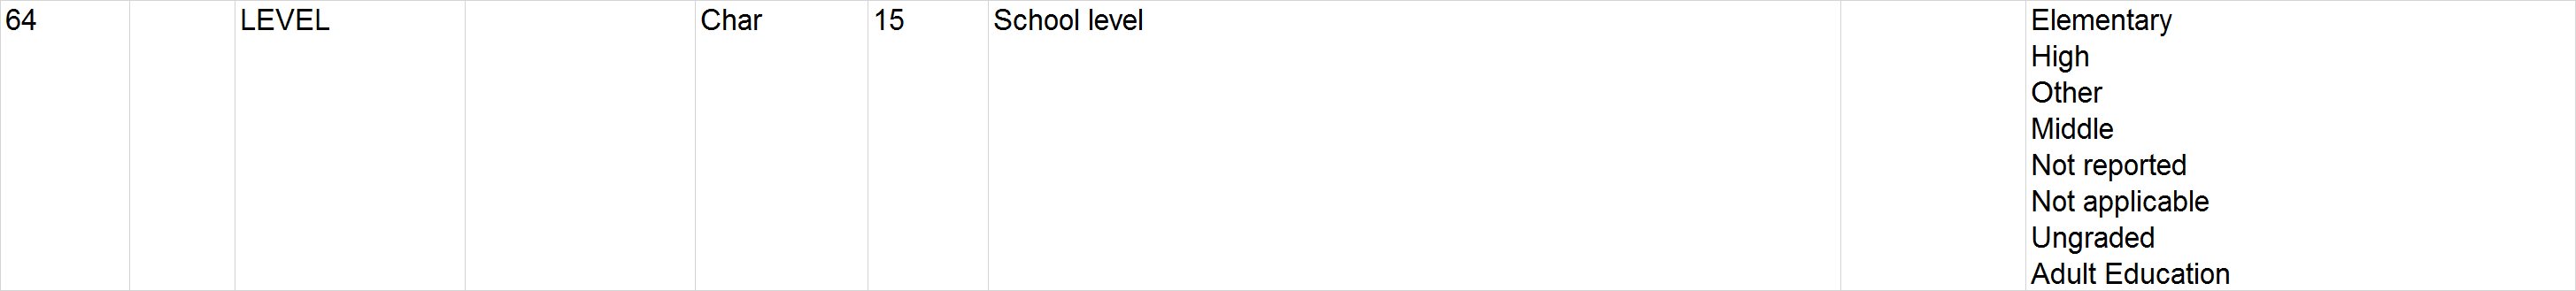

In [114]:
db_district[['SCH_NAME', 'LEVEL']]

,SCH_NAME,LEVEL
4455,DEWITT HIGH SCHOOL,High
4456,DEWITT MIDDLE SCHOOL,Middle
4457,DEWITT ELEMENTARY SCHOOL,Elementary
4458,GILLETT ELEMENTARY SCHOOL,Elementary
4460,SEACBEC (WARREN),High
4461,EASTSIDE NEW VISION CHARTER SCHOOL,Elementary
4462,WARREN HIGH SCHOOL DISTRICT CONVERSION CHARTER,High
4463,WARREN MIDDLE SCHOOL,Middle
4464,BRUNSON NEW VISION CHARTER SCHOOL,Elementary
4465,CENTRAL ELEMENTARY SCHOOL,Elementary


In [115]:
def schoolLevel (inputValue):
    
    
    
    d = {"HIGH SCHOOL"            :     "High",
        "MIDDLE"                  :     "Middle",
        "JUNIOR HIGH"             :     "Middle",
        "ADMINISTRATION"          :     "Administration",
        "ADMINISTRATIVE"          :     "Administration",
        "ELEMENTARY"              :     "Elementary",
        "SENIOR HIGH"             :     "High",
        "INTERMEDIATE"            :     "Middle",
        "BUS"                     :     "Support",
        "SUPERINTENDENT"          :     "Adminstration",
         "MAINTENANCE"            :     "Support",
         "WAREHOUSE"              :     "Support",
         "DISTRICT"               :     "Administration",
         "CENTRAL"                :     "Administration",
         "HIGH"                   :     "High"
        
                     
        }
    
    
    level = []
    for key in d.keys():
        
        if key in inputValue.upper():
            level.append(d[key])
            if key == "JUNIOR HIGH":
                level = [d['JUNIOR HIGH']]
                break
            
    return level


s = "PLEASANT VW JUNIOR HIGH SCHOOL"
schoolLevel(s)

['Middle']

In [116]:
df['level'] = df.normLocDesc.astype(str).map(schoolLevel)

In [117]:
df[['normLocDesc', 'level']]

,normLocDesc,level
0,PINE BLUFF HIGH SCHOOL,"[High, High]"
1,JACK ROBEY JUNIOR HIGH SCHOOL,[Middle]
2,W T CHENEY ELEMENTARY SCHOOL,[Elementary]
3,WAREHOUSE,[Support]
4,SOUTHWOOD ELEMENTARY SCHOOL,[Elementary]
5,PINE BLUFF SCHOOL ADMINISTRATION BUILDING,[Administration]
6,FIRST WARD,[]
7,SOUTHEAST MIDDLE SCHOOL,[Middle]
8,JORDAN CHANAY BUILDING,[]
9,GIFTEDTALENTED SCOGGINS MAY HALL,[]


In [118]:
df[['normLocDesc', 'level']].to_csv('test_levels.csv', header = True)

# Learn how to match SCH_NAME to LEVEL

In [32]:
from sklearn import tree, pipeline
from sklearn import 

SyntaxError: invalid syntax (<ipython-input-32-1b0fdd78915a>, line 2)

In [33]:
db['SCH_NAME'].head()

0    Sequoyah Sch - Chalkville Campus
1                               Camps
2                             Det Ctr
3       Wallace Sch - Mt Meigs Campus
4           McNeel Sch - Vacca Campus
Name: SCH_NAME, dtype: object

In [34]:
db['norm_SCH_NAME'].head()

0    SEQUOYAH SCH CHALKVILLE CAMPUS
1                             CAMPS
2                           DET CTR
3       WALLACE SCH MT MEIGS CAMPUS
4           MCNEEL SCH VACCA CAMPUS
Name: norm_SCH_NAME, dtype: object

In [35]:
s = db["norm_SCH_NAME"]
s.str.contains("MIDDLE")

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26         True
27        False
28        False
29        False
          ...  
102041    False
102042    False
102043    False
102044    False
102045    False
102046    False
102047    False
102048    False
102049    False
102050    False
102051    False
102052    False
102053    False
102054    False
102055    False
102056    False
102057    False
102058    False
102059    False
102060    False
102061    False
102062    False
102063    False
102064    False
102065    False
102066    False
102067    False
102068    False
102069    False
102070    False
Name: norm_SCH_NAME, Len

In [36]:
db['norm_SCH_NAME'][db.norm_SCH_NAME.str.contains(r'\bOLD\b')]

1035                     OLD SHELL CREATIVE PERFORMING ART
1824                                     OLD HARBOR SCHOOL
4279                                OLD VAIL MIDDLE SCHOOL
4738                                OLD HIGH MIDDLE SCHOOL
5394                            OLD WIRE ELEMENTARY SCHOOL
7115                                  OLD RIVER ELEMENTARY
8144                                  OLD RIVER ELEMENTARY
9586                                  OLD RIVER ELEMENTARY
11413                                  OLD MILL ELEMENTARY
11875                               OLD ORCHARD ELEMENTARY
12220                         OLD ADOBE ELEMENTARY CHARTER
13734                         OLD TOWN ACADEMY K 8 CHARTER
18308                                 OLD GREENWICH SCHOOL
18725                           OLD SAYBROOK MIDDLE SCHOOL
18727                      OLD SAYBROOK SENIOR HIGH SCHOOL
18773                     LEARN STS 18 21 YEAR OLD PROGRAM
18833                            LYME OLD LYME HIGH SCHO

# Build blocker and match

In [119]:
df.sort_values(by = "EducationID", inplace = True)

In [120]:
df.index

Int64Index([567, 568, 569, 570, 571, 572, 573, 574, 575, 135,
            ...
            613, 620, 619, 618, 617, 616, 615, 612, 614, 621],
           dtype='int64', length=1846)

In [121]:
y = ['support', 'administration']
levels = ['administration']

l = [level for level in levels if level not in y]
print (l, l != [])
    

[] False


In [139]:
results = []
SCHID = []
eduid = None

for idx in df.index:
    
    #print (idx)
    query = df.loc[idx]['normLocDesc']
    #query = handle_words(query, exclude = SCHOOL_NOISYWORDS)
    #print (query)
    db_idx = df.loc[idx]['EducationID']
    #print (db_idx)
    block= db[db.LEAIDs == db_idx]
    choices = block.norm_SCH_NAME
    #choices = choices.map(lambda x: handle_words(x, exclude = SCHOOL_NOISYWORDS))
    #choices = handle_strings(choices, set(SCHOOL_NOISYWORDS))
    #print(choices)
    levels_cant_match = ['support', 'administration']
    levels = df.loc[idx]['level']
    #print (levels)
    #sort out the support and admin buildings as these are not in NCES.  Don't try to match them in else.
    
    if [level for level in levels if level.lower() not in levels_cant_match] != []:
        result = process.extractBests(query, choices)
        #print(result)
        results.append(result)
    else:
        result = "support building, no match"
        #print(result)
        results.append("support building, no match")
    
   
    try:
        best_idx = result[0][2]
        SCHID.append(db.loc[best_idx]['SCHID'].astype(int))
    except:
        best_idx = None
        SCHID.append(None)
        
   




In [133]:
SCHID

[500216,
 500391,
 500217,
 500218,
 None,
 None,
 None,
 500216,
 None,
 501130,
 None,
 None,
 None,
 None,
 None,
 None,
 501570,
 501334,
 500190,
 500192,
 500191,
 501285,
 501538,
 501285,
 501287,
 None,
 500996,
 500998,
 500995,
 None,
 500275,
 500097,
 None,
 None,
 500997,
 None,
 None,
 None,
 None,
 500690,
 None,
 500691,
 500691,
 None,
 None,
 None,
 None,
 None,
 None,
 501296,
 501289,
 None,
 501292,
 501497,
 None,
 501295,
 None,
 500395,
 None,
 None,
 500042,
 500042,
 None,
 None,
 500043,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 501297,
 501298,
 501233,
 501300,
 501299,
 501517,
 500772,
 501517,
 501517,
 None,
 500772,
 None,
 500867,
 None,
 500871,
 500857,
 None,
 501338,
 None,
 500857,
 500872,
 None,
 None,
 None,
 500855,
 None,
 None,
 None,
 501404,
 501043,
 501041,
 501042,
 501041,
 None,
 501041,
 501043,
 None,
 None,
 501275,
 None,
 501405,
 None,
 None,
 None,
 500052,
 500053,
 None,
 No

In [144]:
df['SCHID']=SCHID

In [145]:
df.SCHID = df.SCHID.fillna(0).astype(int)

In [146]:
df['results']= results

In [147]:
df.columns

Index(['un_loc', 'LociD', 'DudeAccountNumber', 'SalesForceAccountID',
       'EducationID', 'ClientName', 'SchoolDudeReference', 'PhoneNumber',
       'Address1', 'City', 'State', 'ZipCode', 'Country', 'Market', 'Industry',
       'StudentCount', 'LocDesc', 'LocSquareFootage', 'LocationZip', 'Zipnum',
       'COUNTYNM', 'County', 'Regions', 'normLocDesc', 'level', 'SCHID',
       'results'],
      dtype='object')

In [149]:
df[['results', 'normLocDesc', 'level', 'SCHID']]


,results,normLocDesc,level,SCHID
567,"[(DEWITT HIGH SCHOOL, 100, 4455), (DEWITT MIDD...",DEWITT HIGH SCHOOL,"[High, High]",500216
568,"[(GILLETT ELEMENTARY SCHOOL, 95, 4458), (DEWIT...",GILLETT ELEMENTARY,[Elementary],500391
569,"[(DEWITT MIDDLE SCHOOL, 100, 4456), (DEWITT HI...",DEWITT MIDDLE SCHOOL,[Middle],500217
570,"[(DEWITT ELEMENTARY SCHOOL, 100, 4457), (GILLE...",DEWITT ELEMENTARY SCHOOL,[Elementary],500218
571,"support building, no match",DEWITT SPECIAL SERVICES,[],0
572,"support building, no match",ADMINISTRATION BUILDING,[Administration],0
573,"support building, no match",ALL SCHOOL BUILDINGS,[],0
574,"[(DEWITT HIGH SCHOOL, 81, 4455), (GILLETT ELEM...",GILLETT HIGH SCHOOL,"[High, High]",500216
575,"support building, no match",MAINTENANCEBUS SHOP,"[Support, Support]",0
135,[(WARREN HIGH SCHOOL DISTRICT CONVERSION CHART...,WARREN HIGH SCHOOL,"[High, High]",501130


In [150]:
df.to_excel("Sample_match.xlsx")

In [71]:
df.loc[613]

un_loc                                            2105772032-5.0
LociD                                                          5
DudeAccountNumber                                     2105772032
SalesForceAccountID                           0013700000BYHxgAAH
EducationID                                                  nan
ClientName             Jacksonville North Pulaski School Distict
SchoolDudeReference                                            0
PhoneNumber                                       (501) 241-2080
Address1                                   1414 West Main Street
City                                                Jacksonville
State                                                         AR
ZipCode                                                    72076
Country                                            United States
Market                                                 Education
Industry                                               Education
StudentCount             

# Compare 2 approaches

In [ ]:
df_old = pd.read_csv('sample_match.csv')
df_old.NCESSCH = df_old.NCESSCH.astype(str)
print(df_old.shape)

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,4))
df_res.Score.hist(ax=ax1).set_title('Only Name')
ax1.vlines(df_res.Score.mean(), ymin=0, ymax=600, label='Mean Score %.2f' % df_res.Score.mean())
ax1.legend()
df_old.Score.hist(ax=ax2).set_title('Name+Address')
ax2.vlines(df_old.Score.mean(), ymin=0, ymax=600, label='Mean Score %.2f' % df_old.Score.mean())
ax2.legend();

**We can see 2 groups in case of matching only names: **
- in first group matches are almost exact (score > 80)
- in second one scores are quite low

**Mean score is slightly higher for matching only names**

In [ ]:
df_cmp = pd.merge(df_res, df_old, on='un_loc', suffixes=('_on', '_na'))
print(df_cmp.shape)
df_cmp.columns

In [ ]:
df_cmp['equal_NCESSCH'] = (df_cmp.NCESSCH_on == df_cmp.NCESSCH_na).astype(int)
df_cmp.equal_NCESSCH.value_counts(normalize=True)

**NCESSCH are the same for 54% of samples**

In [ ]:
_, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8,8))
df_cmp.Score_on[df_cmp.equal_NCESSCH==0].hist(ax=axes[0][0]).set_title('Only Name - Different NCESSCH')
df_cmp.Score_on[df_cmp.equal_NCESSCH==1].hist(ax=axes[0][1]).set_title('Only Name - Same NCESSCH')
df_cmp.Score_na[df_cmp.equal_NCESSCH==0].hist(ax=axes[1][0]).set_title('Name+Address - Different NCESSCH')
df_cmp.Score_na[df_cmp.equal_NCESSCH==1].hist(ax=axes[1][1]).set_title('Name+Address - Same NCESSCH');

# Test script

In [ ]:
!python fuzzy_script.py -o sample_match_name_only.csv